In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 110856 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [1]:
import os
print(os.getcwd())

/home/harsh/harsh/Chess-Aries


In [2]:
os.chdir('Dataset')

In [3]:
print(os.getcwd())

/home/harsh/harsh/Chess-Aries/Dataset


In [4]:
!ls

 Empty		'White Pawn'	 'Yellow Knight'   chess_train.mat
 New		'White Queen'	 'Yellow Pawn'	   chess_train_final.mat
'White Bishop'	'White Rook'	 'Yellow Queen'    saved_models
'White King'	'Yellow Bishop'  'Yellow Rook'	   untitled.m
'White Knight'	'Yellow King'	  _DS_Store


In [5]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv1D, Conv2D, MaxPooling2D, MaxPooling1D
from keras import backend as K
import h5py
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
batch_size = 32
num_classes = 13
epochs = 225

In [7]:
trainset = {}
#f = h5py.File('chess_train.mat')
#for k, v in f.items():
#    trainset[k] = np.array(v)
trainset = sio.loadmat('chess_train_final.mat')
print("trainset size X:", trainset['X'].shape)
print("trainset size Y:", trainset['Y'].shape)



trainset size X: (100, 100, 3, 832)
trainset size Y: (832, 1)


In [8]:
trainset['X'] = np.rollaxis(trainset['X'], axis = 3)
#trainset['X'] = np.rollaxis(trainset['X'], axis = 3, start = 1)
#trainset['X'] = np.rollaxis(trainset['X'], axis = 3, start = 2)

#trainset['Y'] = np.rollaxis(trainset['Y'], axis = 1)


In [9]:
print('Trainset size X:',trainset['X'].shape)
print('Trainset size Y:',trainset['Y'].shape)

Trainset size X: (832, 100, 100, 3)
Trainset size Y: (832, 1)


In [10]:
label = trainset['Y']

In [11]:
# convert class vectors to binary class matrices
trainset['Y'] = keras.utils.to_categorical(trainset['Y'], num_classes)

In [12]:
print(trainset['Y'].shape)
#print(trainset['Y'][:,0,:])

(832, 13)


In [13]:
#trainset['Y'] = np.rollaxis(trainset['Y'], axis = 1)

In [14]:
print(trainset['Y'].shape)
print(trainset['Y'][831,:])

(832, 13)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [15]:
print(trainset['X'].shape[0], 'train samples')

832 train samples


In [16]:
# input image dimensions
img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 3)

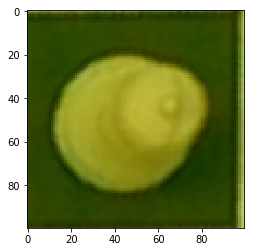

Label: B


In [17]:
# Trainset image
#index=831
index = np.random.randint(831)
M1 = trainset['X'][index,:,:,:]
plt.imshow(M1)
plt.show()
y = label[index,:]

if y==0:
  classes='E'
elif y==1:
  classes='B'
elif y==2:
  classes='K'
elif y==3:
  classes='N'
elif y==4:
  classes='P'
elif y==5:
  classes='Q'
elif y==6:
  classes='R'
elif y==7:
  classes='b'
elif y==8:
  classes='k'
elif y==9:
  classes='n'
elif y==10:
  classes='p'
elif y==11:
  classes='q'
else:
  classes='r'

print('Label:',classes)

In [25]:
model = Sequential()
model.add(BatchNormalization(input_shape = input_shape))
model.add(Conv2D(32, (3, 3), padding = 'valid'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = None, padding = 'valid'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'valid'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = None, padding = 'valid'))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding = 'valid'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = None, padding = 'valid'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 100, 100, 3)       12        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 32)        0         
__________

In [26]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#datagen = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
#    rotation_range=20,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    horizontal_flip=True)

datagen.fit(trainset['X'])

model.fit_generator(datagen.flow(trainset['X'], trainset['Y'], batch_size=32),
                    steps_per_epoch=len(trainset['X']) / 32, epochs=epochs)


#model.fit(trainset['X'], trainset['Y'],
#          batch_size=batch_size,
#          epochs=epochs,
#          verbose=1,
#         )

Epoch 1/225
26/26 [==============================] - 1s 46ms/step - loss: 2.5505 - acc: 0.0998
Epoch 2/225
26/26 [==============================] - 1s 43ms/step - loss: 2.3950 - acc: 0.1502
Epoch 3/225
26/26 [==============================] - 1s 42ms/step - loss: 2.1865 - acc: 0.1911
Epoch 4/225
26/26 [==============================] - 1s 43ms/step - loss: 2.0084 - acc: 0.2163
Epoch 5/225
26/26 [==============================] - 1s 42ms/step - loss: 1.8364 - acc: 0.2356
Epoch 6/225
26/26 [==============================] - 1s 42ms/step - loss: 1.8087 - acc: 0.2680
Epoch 7/225
26/26 [==============================] - 1s 43ms/step - loss: 1.7528 - acc: 0.2849
Epoch 8/225
26/26 [==============================] - 1s 42ms/step - loss: 1.6838 - acc: 0.3161
Epoch 9/225
26/26 [==============================] - 1s 42ms/step - loss: 1.6789 - acc: 0.2752
Epoch 10/225
26/26 [==============================] - 1s 43ms/step - loss: 1.6611 - acc: 0.2704
Epoch 11/225
26/26 [=============================

26/26 [==============================] - 1s 42ms/step - loss: 0.4066 - acc: 0.8293
Epoch 171/225
26/26 [==============================] - 1s 43ms/step - loss: 0.4898 - acc: 0.8101
Epoch 172/225
26/26 [==============================] - 1s 42ms/step - loss: 0.4400 - acc: 0.8365
Epoch 173/225
26/26 [==============================] - 1s 43ms/step - loss: 0.4354 - acc: 0.8209
Epoch 174/225
26/26 [==============================] - 1s 43ms/step - loss: 0.4761 - acc: 0.8029
Epoch 175/225
26/26 [==============================] - 1s 42ms/step - loss: 0.4861 - acc: 0.8113
Epoch 176/225
26/26 [==============================] - 1s 42ms/step - loss: 0.4065 - acc: 0.8462
Epoch 177/225
26/26 [==============================] - 1s 42ms/step - loss: 0.5653 - acc: 0.8053
Epoch 178/225
26/26 [==============================] - 1s 42ms/step - loss: 0.4235 - acc: 0.8377
Epoch 179/225
26/26 [==============================] - 1s 42ms/step - loss: 0.4247 - acc: 0.8305
Epoch 180/225
26/26 [=======================

In [45]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'trained_model_final_bs32_225_dg.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /home/harsh/harsh/Chess-Aries/Dataset/saved_models/trained_model_final_bs32_225_dg.h5 


In [18]:
from keras.models import load_model

import numpy as np

opt = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
model = load_model('saved_models/trained_model_final_bs32_225_dg.h5')

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 100, 100, 3)       12        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 32)        0         
__________

(100, 100, 3)


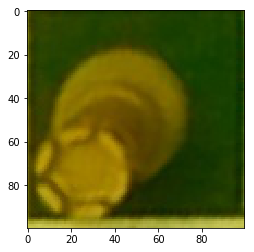

(1, 100, 100, 3)
[12]
r
(100, 100, 3)


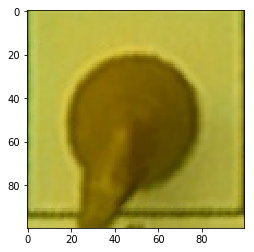

(1, 100, 100, 3)
[9]
n
(100, 100, 3)


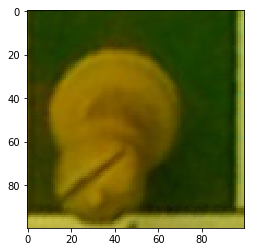

(1, 100, 100, 3)
[7]
b
(100, 100, 3)


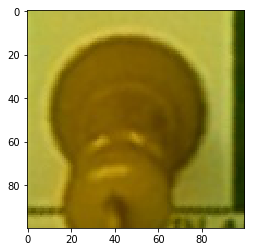

(1, 100, 100, 3)
[8]
k
(100, 100, 3)


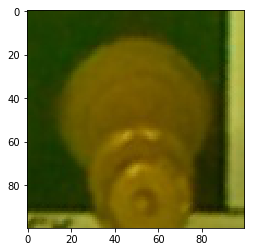

(1, 100, 100, 3)
[11]
q
(100, 100, 3)


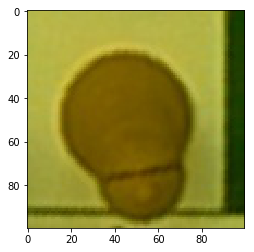

(1, 100, 100, 3)
[7]
b
(100, 100, 3)


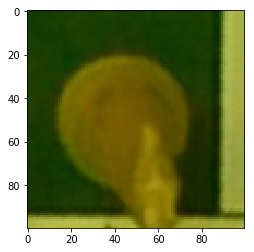

(1, 100, 100, 3)
[9]
n
(100, 100, 3)


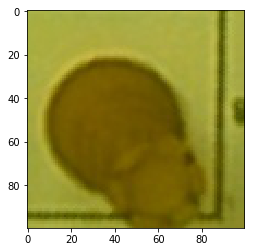

(1, 100, 100, 3)
[12]
r


In [22]:
#import sys
from PIL import Image
#sys.modules['Image'] = Image 

#index = np.random.randint(63)
#from keras.preprocessing import image

l = [None] * 64

for r in range(1,9):
  img = Image.open('New/opencv_frame1_'+str(r)+'.jpg')
  img = np.array(img)
  img = np.reshape(img,(100,100,3))
  #y = image.img_to_array(img)

  #print(y.shape)
  print(img.shape)

  plt.imshow(img)
  plt.show()
  img = np.reshape(img,(1,100,100,3))
  print(img.shape)

  y = model.predict_classes(img)
  print(y)

  if y==0:
    classes='E'
  elif y==1:
    classes='B'
  elif y==2:
    classes='K'
  elif y==3:
    classes='N'
  elif y==4:
    classes='P'
  elif y==5:
    classes='Q'
  elif y==6:
    classes='R'
  elif y==7:
    classes='b'
  elif y==8:
    classes='k'
  elif y==9:
    classes='n'
  elif y==10:
    classes='p'
  elif y==11:
    classes='q'
  else:
    classes='r'


  print(classes)
  
  l[r-1]=classes

In [23]:
l

['r',
 'n',
 'b',
 'k',
 'q',
 'b',
 'n',
 'r',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]